# Term Deposit Marketing

## Building a Robust Solution for Term Deposit Subscription Prediction

As a growing participant in the European banking sector, effectively addressing challenges such as fraud detection, sentiment analysis, and customer behavior insights is essential to achieving success. Even modest datasets represent valuable resources that can drive solutions to these challenges while enhancing customer satisfaction.

We have collected a dataset derived from customer interactions, focusing specifically on calls aimed at promoting our service subscription: term deposits. This dataset includes features related to both customers and call details. To maintain strict adherence to customer privacy regulations, all personal identifying information has been removed.

### Objectives

To ensure a robust and effective solution, we adopt a three-layer approach:

#### 1. Exploratory Analysis
We begin with an in-depth exploratory analysis to:
- Understand the dataset's structure.
- Examine its shape and key characteristics.
- Summarize key outputs to identify patterns, detect potential issues, and gain initial insights for informed decision-making.

#### 2. High-Accuracy Filtering Model
The first layer focuses on building a high-accuracy machine learning model to:
- Filter out cases with a high likelihood of failure.
- Minimize unsuccessful calls, improving efficiency and resource allocation.

#### 3. High-Precision Persuasion Model
The second layer employs a high-precision model designed to:
- Predict whether a customer is likely to be persuaded to subscribe to the term deposit.
- Target customers who pass the first stage for focused and effective follow-ups.

#### 4. Clustering-Based Success Analysis
The final layer applies a clustering approach to:
- Divide the dataset features into five distinct clusters.
- Provide insights into the probability of success within each cluster.
- Enable better strategic decisions and personalized engagement strategies.

### Conclusion

By integrating these layers, we aim to maximize the success rate of term deposit subscriptions. This approach leverages machine learning and clustering techniques to deliver targeted, efficient, and data-driven solutions that align with business objectives.


## Exploratory Data Analysis

In the first step, we analyze the collected call data. This analysis provides insights into both the quantity and quality of the input data for each feature. Additionally, it examines the ratio of successful sales to the total number of calls, offering valuable information about the overall success rate.

In [1]:
import pandas as pd
import logging
logging.getLogger().disabled = True
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
term_deposit_marketing_2020=pd.read_csv("term-deposit-marketing-2020.csv")

### The dataset schema

In [4]:
term_deposit_marketing_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
term_deposit_marketing_2020.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


The dataset comprises 13 input features along with an output variable that indicates the outcome of a marketing call. The output variable (y) specifies whether the customer agreed to the term deposit subscription. The input features encompass various aspects of customer information, including demographic details such as age, job, marital status, and education level. Additionally, the dataset reflects the customers' financial status through features like account balance, loan status, and housing information. It also includes details about the customers' interaction with the campaign, such as the number of contacts made, the duration of the last call (in seconds), and the date of the most recent contact.

## Data Analysis

In [6]:
term_deposit_marketing_2020.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


# Dataset Description

This dataset contains **40,000 records** and 14 columns related to customer data and their banking activity. Below is a detailed description of each feature, including its range, unique values, and key statistics:

---

## 1. Age
- **Type**: Numerical
- **Range**: 19 to 95 years
- **Statistics**:
  - Mean: 40.54
  - Standard Deviation: 9.64
  - Median: 39
  - Interquartile Range (IQR): 33 to 48
- **Description**: Represents the age of the customer. Most customers fall within the range of 33 to 48 years.

---

## 2. Job
- **Type**: Categorical
- **Unique Values**: 12
- **Most Common Value**: `blue-collar` (9,383 occurrences)
- **Description**: Indicates the job type of the customer (e.g., `blue-collar`, `management`, `technician`, etc.).

---

## 3. Marital
- **Type**: Categorical
- **Unique Values**: 3 (`married`, `single`, `divorced`)
- **Most Common Value**: `married` (24,386 occurrences)
- **Description**: Specifies the marital status of the customer.

---

## 4. Education
- **Type**: Categorical
- **Unique Values**: 4 (`primary`, `secondary`, `tertiary`, `unknown`)
- **Most Common Value**: `secondary` (20,993 occurrences)
- **Description**: Represents the education level of the customer.

---

## 5. Default
- **Type**: Categorical
- **Unique Values**: 2 (`yes`, `no`)
- **Most Common Value**: `no` (39,191 occurrences)
- **Description**: Indicates whether the customer has credit in default.

---

## 6. Balance
- **Type**: Numerical
- **Range**: -8,019 to 102,127
- **Statistics**:
  - Mean: 1,274.28
  - Standard Deviation: 2,903.77
  - Median: 407
  - Interquartile Range (IQR): 54 to 1,319
- **Description**: Represents the account balance of the customer in euros. The data includes negative balances, with a wide range of values.

---

## 7. Housing
- **Type**: Categorical
- **Unique Values**: 2 (`yes`, `no`)
- **Most Common Value**: `yes` (24,031 occurrences)
- **Description**: Indicates whether the customer has a housing loan.

---

## 8. Loan
- **Type**: Categorical
- **Unique Values**: 2 (`yes`, `no`)
- **Most Common Value**: `no` (33,070 occurrences)
- **Description**: Indicates whether the customer has a personal loan.

---

## 9. Contact
- **Type**: Categorical
- **Unique Values**: 3 (`unknown`, `cellular`, `telephone`)
- **Most Common Value**: `cellular` (24,914 occurrences)
- **Description**: Specifies the contact communication type with the customer.

---

## 10. Day
- **Type**: Numerical
- **Range**: 1 to 31
- **Statistics**:
  - Mean: 16.02
  - Standard Deviation: 8.28
  - Median: 17
- **Description**: Represents the day of the month the customer was last contacted.

---

## 11. Month
- **Type**: Categorical
- **Unique Values**: 11 (`jan` to `dec`)
- **Most Common Value**: `may` (13,532 occurrences)
- **Description**: Indicates the month the customer was last contacted.

---

## 12. Duration
- **Type**: Numerical
- **Range**: 0 to 4,918 seconds
- **Statistics**:
  - Mean: 254.82 seconds
  - Standard Deviation: 259.37 seconds
  - Median: 175 seconds
- **Description**: Represents the duration of the last call with the customer, in seconds. Note that this feature is strongly correlated with the outcome (`y`).

---

## 13. Campaign
- **Type**: Numerical
- **Range**: 1 to 63
- **Statistics**:
  - Mean: 2.88
  - Standard Deviation: 3.24
  - Median: 2
- **Description**: Represents the number of contacts performed during this campaign for the customer.

---

## 14. y (Target)
- **Type**: Categorical
- **Unique Values**: 2 (`yes`, `no`)
- **Most Common Value**: `no` (37,104 occurrences)
- **Description**: Indicates whether the customer has subscribed to a term deposit (`yes` or `no`).

---

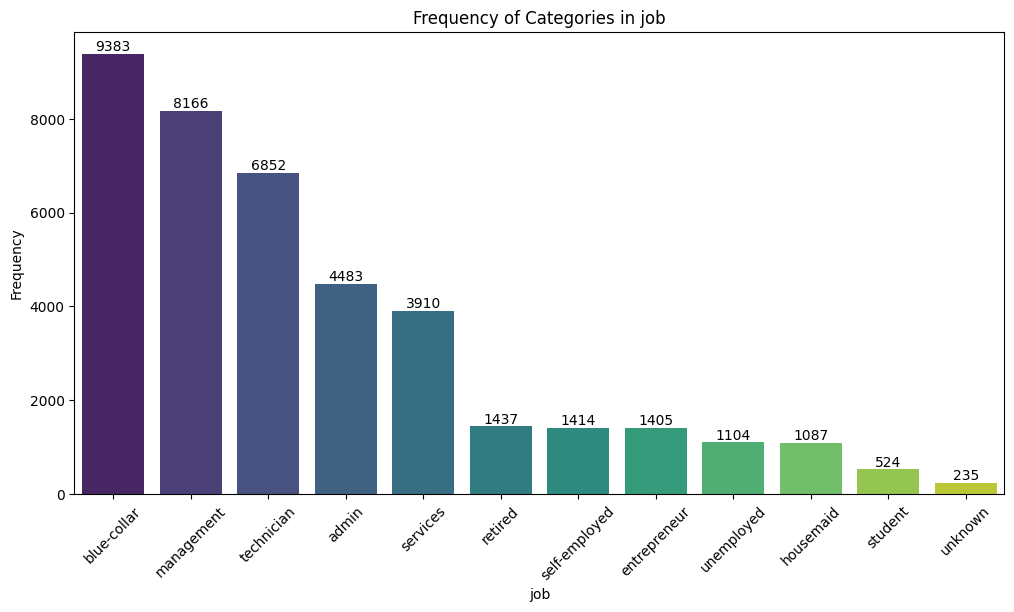

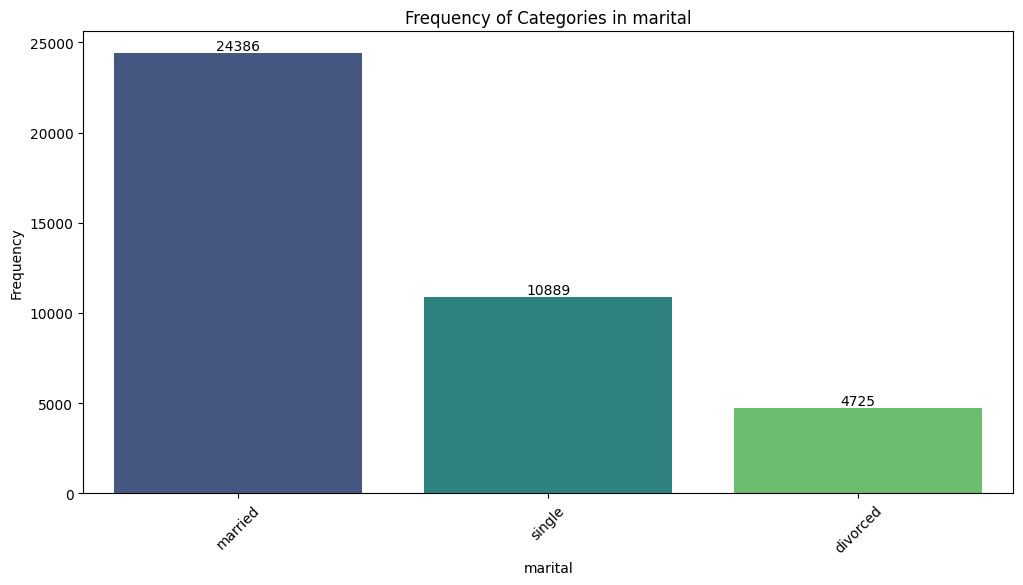

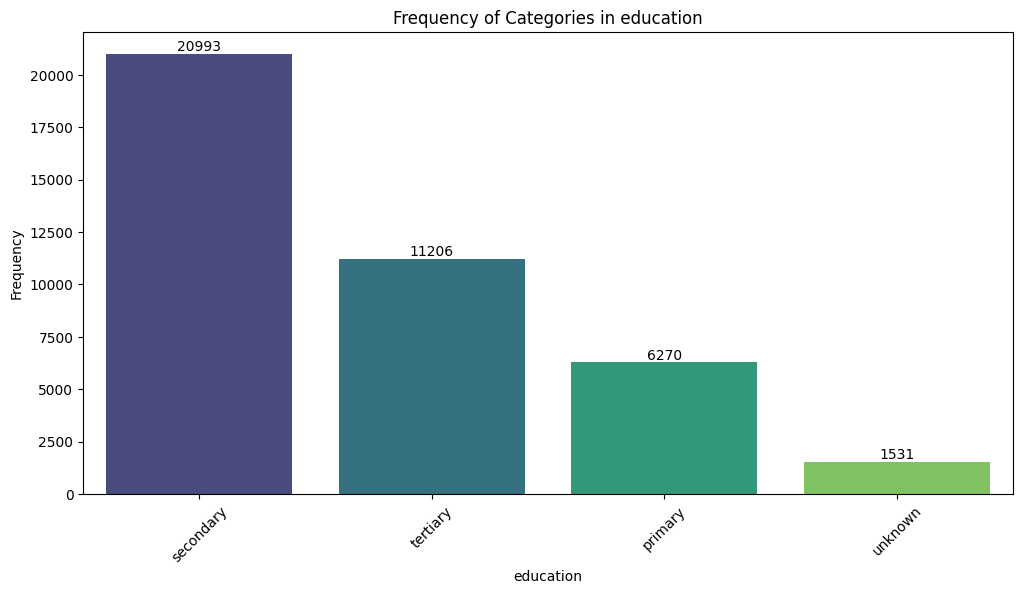

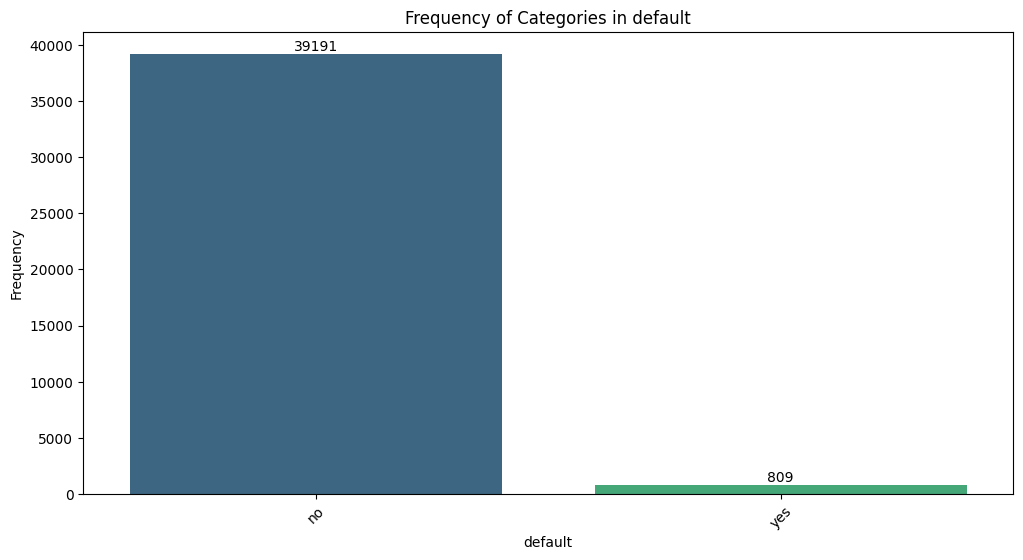

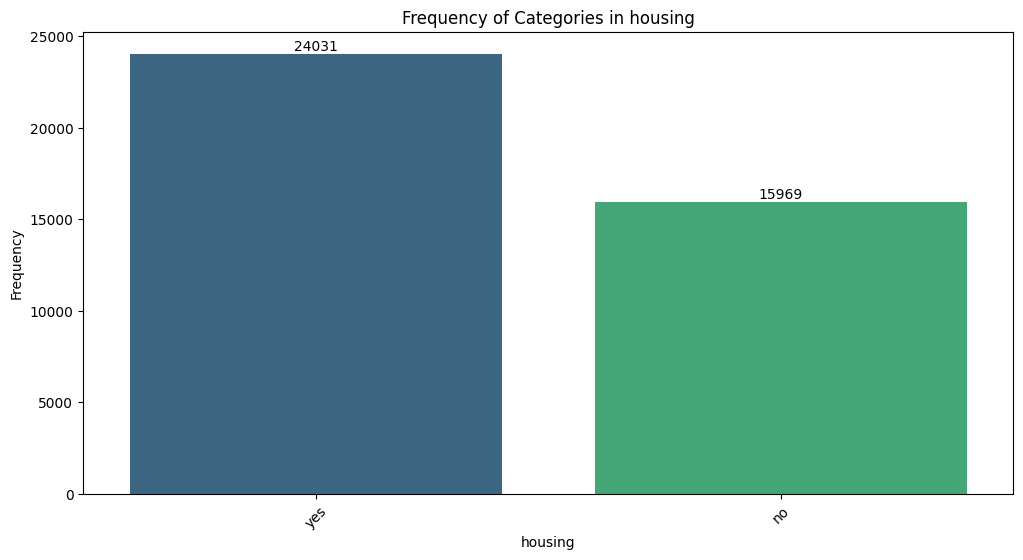

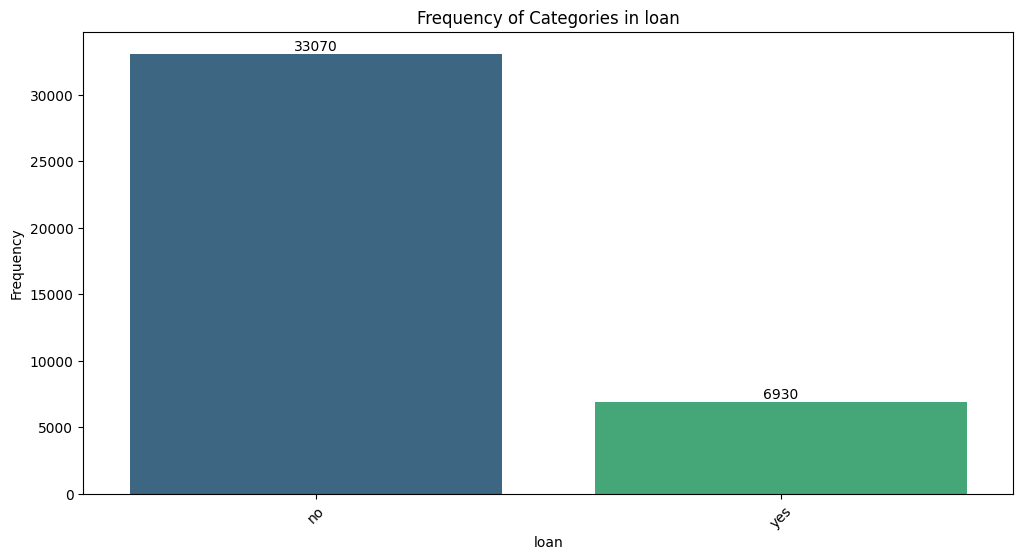

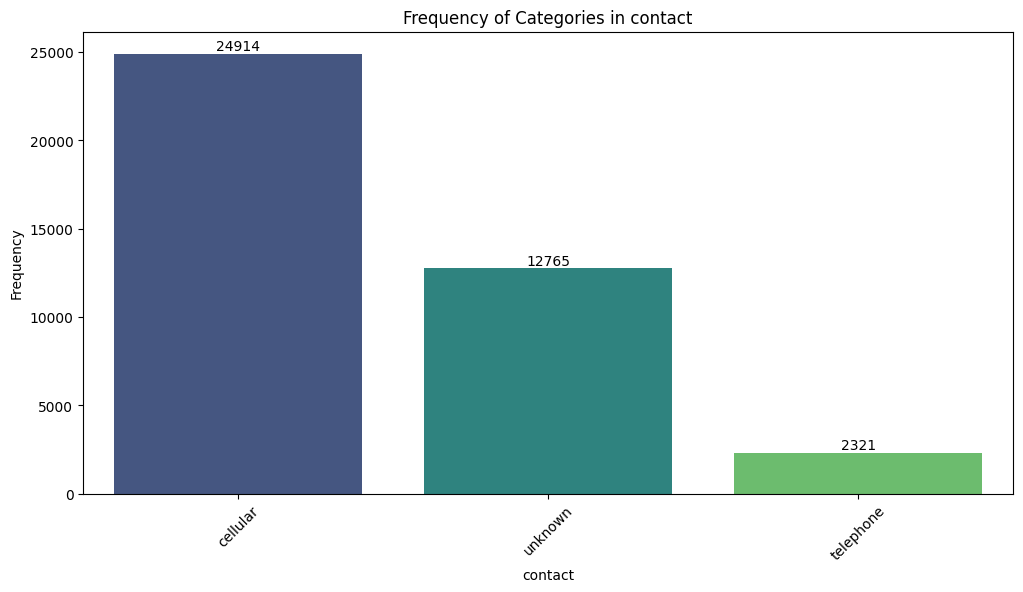

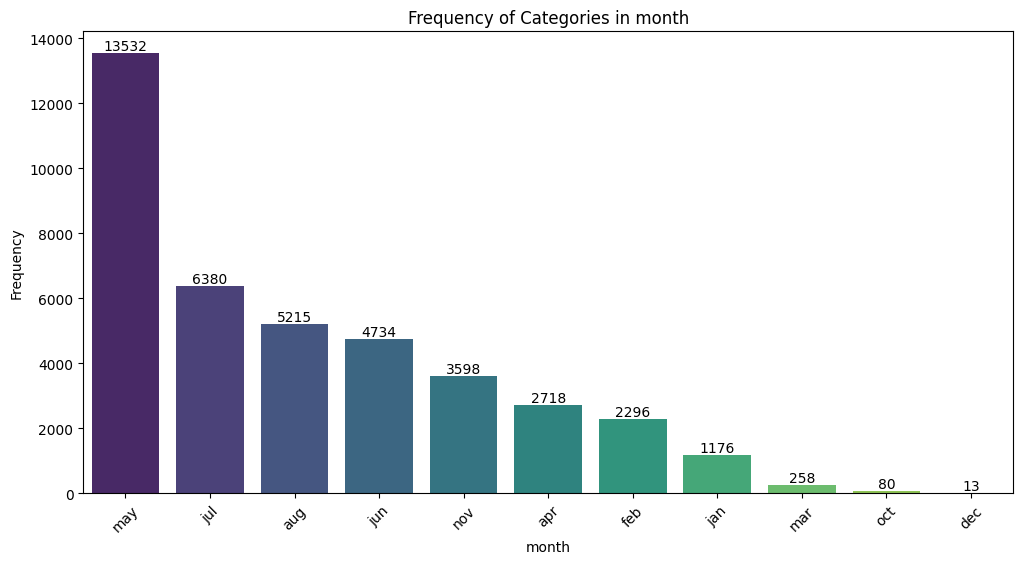

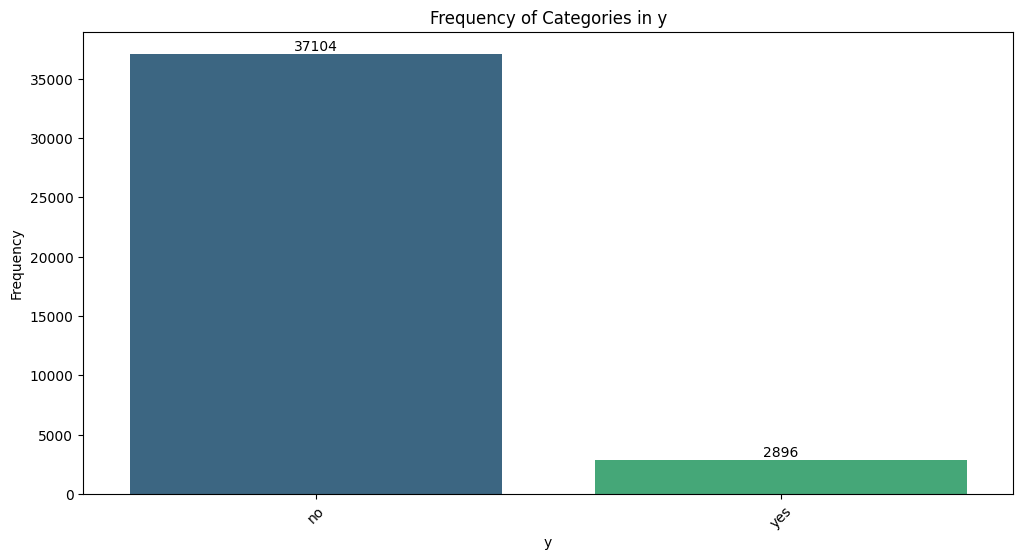

In [7]:
categorical_cols = term_deposit_marketing_2020.select_dtypes(include=['object', 'category']).columns
for cat_col in categorical_cols:
    # Calculate frequencies for each category
    counts = term_deposit_marketing_2020[cat_col].value_counts()
    
    # Prepare the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=counts.index, y=counts.values, palette="viridis")
    
    # Annotate bar with the count values
    for i, count in enumerate(counts.values):
        plt.text(i, count, str(count), ha='center', va='bottom')
    
    # Title and labels
    plt.title(f'Frequency of Categories in {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

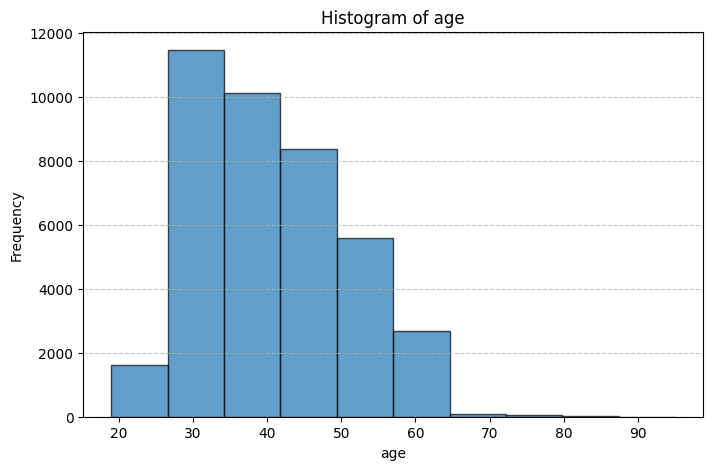

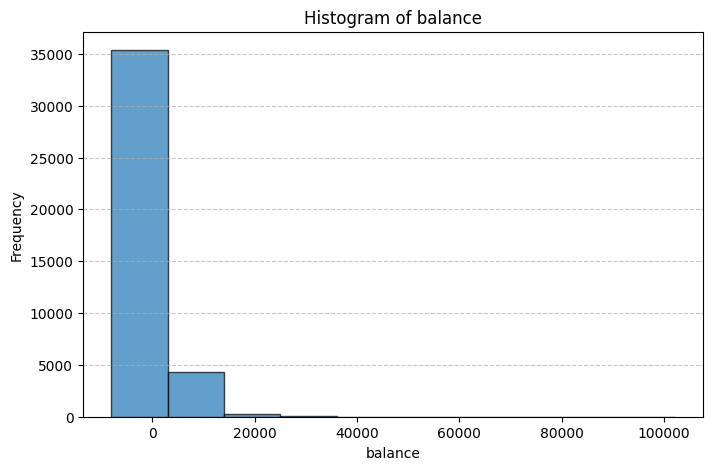

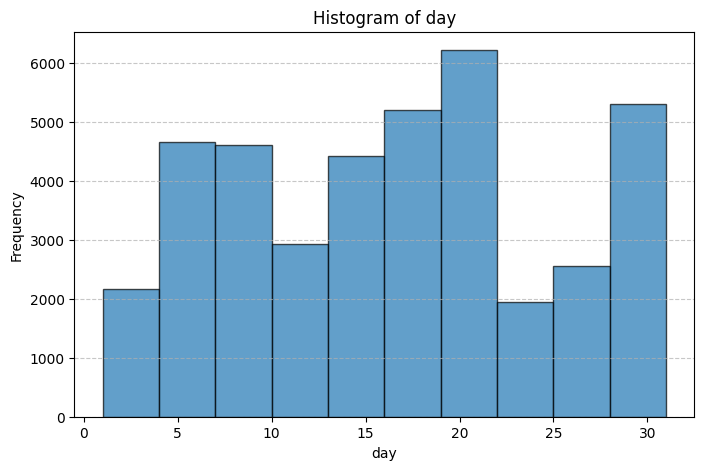

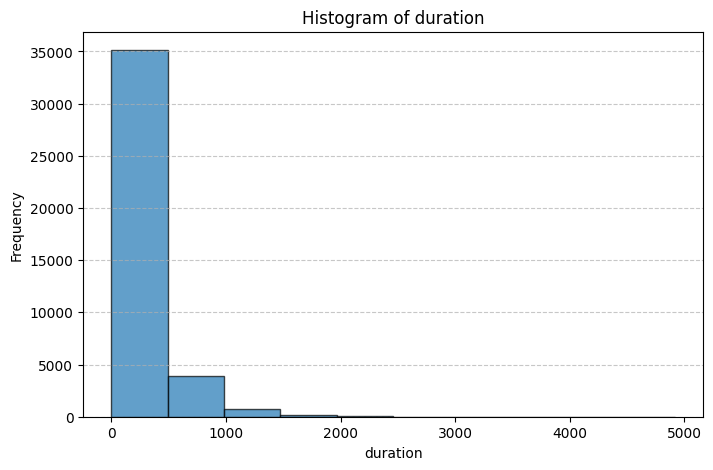

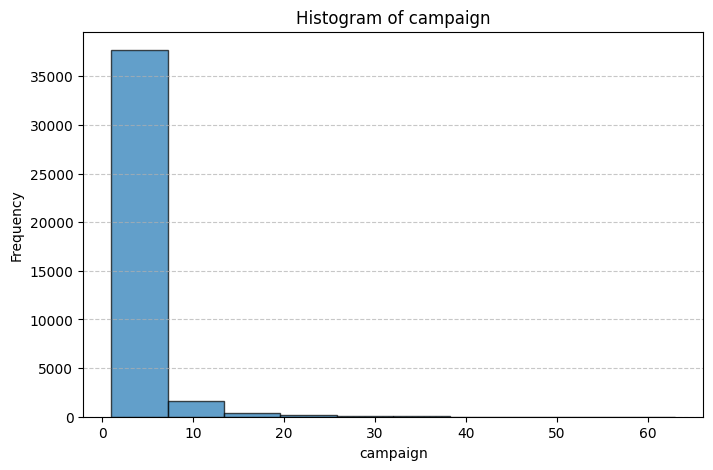

In [8]:
continuous_cols = term_deposit_marketing_2020.select_dtypes(include=['float', 'int']).columns
for col in continuous_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(term_deposit_marketing_2020[col], edgecolor='k', alpha=0.7)  # Adjust bins as needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

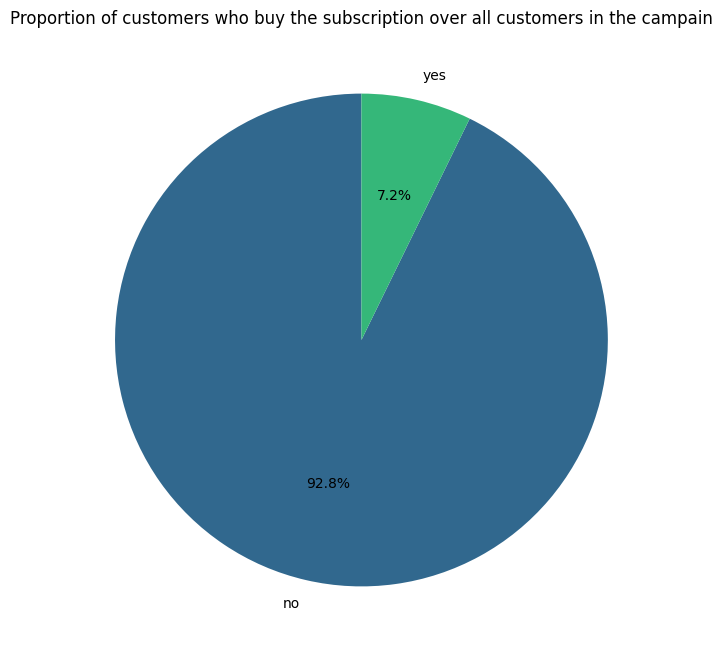

In [9]:
# Calculate the value counts
counts = term_deposit_marketing_2020["y"].value_counts()

# Prepare the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts.values, 
    labels=counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("viridis", len(counts))
)

# Title
plt.title(f'Proportion of customers who buy the subscription over all customers in the campain')
plt.show()


The analysis shows that approximately 93% of customers decline to join the campaign.

In [10]:
average_values = term_deposit_marketing_2020[['campaign', 'duration']].mean()

# Display the results
print(average_values)

campaign      2.882175
duration    254.824300
dtype: float64


## Solution

Through this investigation, we propose a multi-faceted solution based on data-driven models to optimize campaign efficiency and effectiveness:

## 1. Develop a Machine Learning Model for Success Prediction
Design a predictive model to estimate the likelihood of success for each customer. This model can be used to prune customers with a lower probability of conversion, reducing wasted resources and improving campaign focus.

## 2. Refined Model for Future Engagement
Build a specialized predictive model to identify customers who are more likely to accept the campaign in future calls. This approach ensures that such customers remain part of the campaign, even if they decline during the current interaction.

## 3. Customer Clustering and Success Analysis
Implement a clustering algorithm to group customers based on their features. Compute the success probability for each cluster, leveraging shared characteristics within clusters to develop targeted strategies for improved campaign outcomes.


In [11]:
from pycaret.classification import *
import os
os.environ["PYTHONWARNINGS"] = "ignore"
warnings.filterwarnings("ignore")
logging.getLogger("LightGBM").setLevel(logging.ERROR)

In [12]:
random_states=[392, 406, 393, 221, 845, 638, 226, 958, 660, 491]

In [13]:
from pycaret.classification import *
import pandas as pd
import numpy as np

In [ ]:
# Placeholder to store DataFrames
dataframes = []

# Loop over 10 random seeds
for seed in random_states:  # 0 to 9
    print(f"Running PyCaret setup with seed: {seed}")
    clf_setup = setup(
        verbose=False,
        data=term_deposit_marketing_2020,
        target='y',  # The target column
        categorical_features=['job', 'marital', 'education', 'default', 'housing', 'loan'],
        numeric_features=['age', 'balance'],
        session_id=seed,  # Random seed changes here
        feature_selection=True,
        use_gpu=True,
        fold_strategy="stratifiedkfold",
        fold=5
    )
    
    # Get the best model for this seed
    best_model = compare_models()
    
    # Evaluate the best model on holdout set
    model_results = pull()
    
    # Append the DataFrame for this seed
    dataframes.append(model_results)



In [15]:
dfs = pd.concat(dataframes).groupby("Model").mean().sort_values("Recall",ascending=False)
dfs

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
Model,,,,,,,,
Logistic Regression,0.93253,0.86841,0.93253,0.91636,0.91718,0.28370,0.32710,0.4512
Gradient Boosting Classifier,0.93167,0.87413,0.93167,0.91645,0.91910,0.31403,0.34437,1.4064
Ada Boost Classifier,0.93110,0.87117,0.93110,0.91632,0.91961,0.32438,0.34965,0.9600
Linear Discriminant Analysis,0.93052,0.86795,0.93052,0.92156,0.92493,0.40155,0.40865,0.4304
Ridge Classifier,0.93040,0.86795,0.93040,0.91099,0.90735,0.16760,0.23749,0.4870
Naive Bayes,0.92997,0.86126,0.92997,0.92087,0.92428,0.39631,0.40346,0.4310
Quadratic Discriminant Analysis,0.92985,0.86188,0.92985,0.92081,0.92423,0.39605,0.40311,0.4954
Dummy Classifier,0.92760,0.50000,0.92760,0.86050,0.89280,0.00000,0.00000,0.4288
K Neighbors Classifier,0.92565,0.76534,0.92565,0.90971,0.91487,0.29281,0.30980,0.6174


Based on the model search results from PyCaret, we select a model that delivers the highest accuracy (calculated as 
True Predictions
/
All Predictions
True Predictions/All Predictions) to ensure an overall correct prediction rate. Additionally, we choose a model with the highest precision (calculated as 
True Positives
/
(
True Positives
+
False Positives
)
True Positives/(True Positives+False Positives)) to focus on identifying true positive cases more reliably. This precision-oriented approach helps us better identify potential customers who are likely to convert, even if the initial call does not result in a sale, allowing us to follow up effectively and increase the overall success rate in future interactions.

### Solution #1

We have selected the Logistic Regression as the best-performing model in terms of accuracy.

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import csr_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE


In [16]:
# preprocessing
x=term_deposit_marketing_2020.iloc[:,:len(term_deposit_marketing_2020.columns)-1]
y=term_deposit_marketing_2020["y"]
categorical_transformer=OneHotEncoder(drop="first")

numerical_transformer=StandardScaler()
categorical_features=["job","marital","education","default","housing","loan","contact"]
numericak_features=["age","balance"]

preprocessor=ColumnTransformer(
    transformers=[
        ("num",numerical_transformer,numericak_features),
        ("cat",categorical_transformer,categorical_features)
    ]
)

x_processed=preprocessor.fit_transform(x)
x_processed=pd.DataFrame(x_processed.toarray(),columns=preprocessor.get_feature_names_out())
y_processed=y.map({"yes":1,"no":0})

In [17]:
all_random_seeds_results = []
cm=[[0,0],[0,0]]
for state in random_states:
    # Initialize stratified K-Fold cross-validator with 5 splits
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=state)
    smote = SMOTE(sampling_strategy=0.3, random_state=state)


    for fold, (train_index, test_index) in enumerate(skf.split(x_processed, y_processed)):
        # Split the data into training and testing sets for the fold
        X_train, X_test = x_processed.iloc[train_index], x_processed.iloc[test_index]
        Y_train, Y_test = y_processed.iloc[train_index], y_processed.iloc[test_index]
        X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

        
        logistic_regression  = LogisticRegression(random_state=state,max_iter=1000)

        # Fit the model
        logistic_regression.fit(X_train_resampled, Y_train_resampled)

        # Make predictions
        Y_pred = logistic_regression.predict(X_test)
        

        # Calculate metrics
        metrics = {
            "accuracy": accuracy_score(Y_test, Y_pred),
            #"Confusion Matrix": confusion_matrix(Y_test, Y_pred),
            "precision": precision_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "recall": recall_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "f1_score": f1_score(Y_test, Y_pred, average='weighted', zero_division=0),
        }

        # Add the random seed and fold number for traceability
        metrics["random_seed"] = state
        
        metrics["fold"] = fold + 1

        # Append results
        all_random_seeds_results.append(pd.DataFrame([metrics]))
    cm+=confusion_matrix(Y_test,Y_pred)

# Combine results from all random seeds and folds into a single DataFrame
combined_results = pd.concat(all_random_seeds_results, ignore_index=True)

# Calculate average metrics across all random seeds and folds
average_metrics = combined_results.groupby("random_seed").mean(numeric_only=True).mean()

# Display combined results and average metrics
print("Combined Results:")
print(combined_results)
print("\nAverage Metrics:")
print(average_metrics)


Combined Results:
    accuracy  precision    recall  f1_score  random_seed  fold
0   0.925750   0.880997  0.925750  0.893946          392     1
1   0.923375   0.868924  0.923375  0.891807          392     2
2   0.925750   0.871000  0.925750  0.892569          392     3
3   0.924500   0.876323  0.924500  0.893285          392     4
4   0.927875   0.909210  0.927875  0.894251          392     5
5   0.925750   0.875334  0.925750  0.893034          406     1
6   0.926875   0.886465  0.926875  0.894081          406     2
7   0.922875   0.866860  0.922875  0.891326          406     3
8   0.927250   0.884886  0.927250  0.893334          406     4
9   0.925500   0.880208  0.925500  0.893697          406     5
10  0.924250   0.874523  0.924250  0.892932          393     1
11  0.927000   0.888813  0.927000  0.894378          393     2
12  0.922875   0.868205  0.922875  0.891549          393     3
13  0.925875   0.885188  0.925875  0.894901          393     4
14  0.926250   0.883275  0.926250  0.

Using the Gradient Boosting Classifier, trained on our dataset and validated with 5-fold cross-validation, we developed a predictive model to identify customers unlikely to show interest in our service. By excluding these individuals from the potential customer list, we can significantly optimize campaign efforts. Achieving an accuracy of 93%, the model has the potential to reduce 93% of the 7,700 employee hours spent during the previous campaign, saving over 7,000 hours.

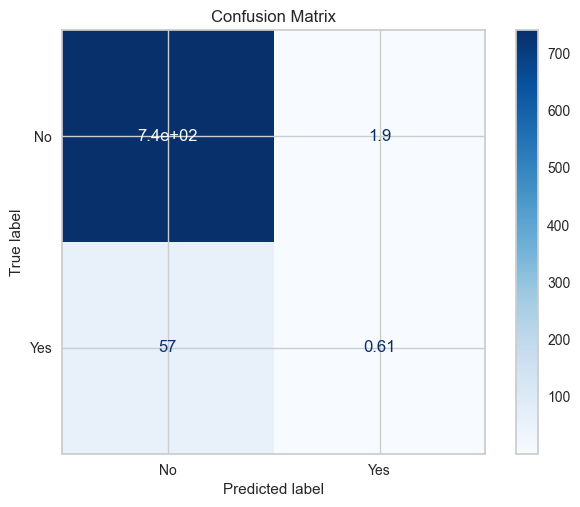

In [19]:

cm=np.divide(cm,len(random_states))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

The confusion matrix indicates that our initial solution accurately identifies 7,400 non-potential customers, allowing us to eliminate them in the first step without incurring costly investments. However, due to prediction errors, it also incorrectly classifies 57 potential customers, resulting in missed opportunities.

### Solution #2

We have chosen Linear Discriminant Analysis as the second solution, as it delivers the highest precision.

In [ ]:

from pycaret.classification import *
import pandas as pd
import numpy as np

# Placeholder to store DataFrames
dataframes = []

# Loop over 10 random seeds
for seed in random_states:  # 0 to 9
    print(f"Running PyCaret setup with seed: {seed}")
    clf_setup = setup(
        verbose=False,
        data=term_deposit_marketing_2020,
        target='y',  # The target column
        categorical_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'],
        numeric_features=['age', 'balance', 'day', 'duration', 'campaign'],
        session_id=seed,  # Random seed changes here
        feature_selection=True,
        use_gpu=True,
        fold_strategy="stratifiedkfold",
        fold=5
    )
    
    # Get the best model for this seed
    best_model = compare_models()
    
    # Evaluate the best model on holdout set
    model_results = pull()
    
    # Append the DataFrame for this seed
    dataframes.append(model_results)

# Calculate the mean of all DataFrames along the random seed axis


In [76]:
dfs = pd.concat(dataframes).groupby("Model").mean().sort_values("Prec.",ascending=False)
dfs

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
Model,,,,,,,,
Linear Discriminant Analysis,0.93047,0.86814,0.93047,0.92152,0.92486,0.40103,0.40826,0.4652
Naive Bayes,0.93001,0.86231,0.93001,0.92092,0.92432,0.39619,0.40356,0.4609
Quadratic Discriminant Analysis,0.92995,0.86292,0.92995,0.92086,0.92425,0.39592,0.40323,0.5071
Gradient Boosting Classifier,0.93189,0.87402,0.93189,0.91679,0.91947,0.31777,0.34764,1.6327
Ada Boost Classifier,0.93112,0.87055,0.93112,0.91632,0.91942,0.32188,0.34818,0.9220
Logistic Regression,0.93249,0.86866,0.93249,0.91632,0.91711,0.28295,0.32650,0.4795
Light Gradient Boosting Machine,0.93132,0.86745,0.93132,0.91594,0.91883,0.31282,0.34194,1.1741
Ridge Classifier,0.93034,0.86814,0.93034,0.91077,0.90727,0.16697,0.23634,0.5080
K Neighbors Classifier,0.92555,0.76512,0.92555,0.90980,0.91493,0.29434,0.31087,0.5896


In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedBaggingClassifier

In [33]:
all_random_seeds_results = []
cm=[[0,0],[0,0]]

for state in random_states:
    # Initialize stratified K-Fold cross-validator with 5 splits
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=state)
    smote = SMOTE(sampling_strategy="auto", random_state=state)
    undersample = RandomUnderSampler(sampling_strategy=0.7, random_state=state)  # Keep 70% of majority class
    pipeline = Pipeline([
    ('smote', smote),
    ('undersample', undersample)])



    for fold, (train_index, test_index) in enumerate(skf.split(x_processed, y_processed)):
        # Split the data into training and testing sets for the fold
        X_train, X_test = x_processed.iloc[train_index], x_processed.iloc[test_index]
        Y_train, Y_test = y_processed.iloc[train_index], y_processed.iloc[test_index]

        #class_weights=compute_class_weight(class_weight="balanced",classes=np.unique(y_processed),y=y_processed)

        #priors=class_weights/class_weights.sum()

        # Initialize Linear Discriminant Analysis classifier
        #X_train_resampled, Y_train_resampled = pipeline.fit_resample(X_train, Y_train)

        lda_classifier = LinearDiscriminantAnalysis()#priors=priors)
        bbc=BalancedBaggingClassifier(lda_classifier,sampling_strategy="auto",replacement=False,random_state=state)

        # Fit the model
        bbc.fit(X_train, Y_train)

        # Make predictions
        Y_pred = bbc.predict(X_test)
        


        # Calculate metrics
        metrics = {
            "accuracy": accuracy_score(Y_test, Y_pred),
            "precision": precision_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "recall": recall_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "f1_score": f1_score(Y_test, Y_pred, average='weighted', zero_division=0),
        }

        # Add the random seed and fold number for traceability
        metrics["random_seed"] = state
        metrics["fold"] = fold + 1

        # Append results
        all_random_seeds_results.append(pd.DataFrame([metrics]))
    cm+=confusion_matrix(Y_test,Y_pred)
# Combine results from all random seeds and folds into a single DataFrame
combined_results = pd.concat(all_random_seeds_results, ignore_index=True)

# Calculate average metrics across all random seeds and folds
average_metrics = combined_results.groupby("random_seed").mean(numeric_only=True).mean()

# Display combined results and average metrics
print("Combined Results:")
print(combined_results)
print("\nAverage Metrics:")
print(average_metrics)

Combined Results:
    accuracy  precision    recall  f1_score  random_seed  fold
0   0.566875   0.888823  0.566875  0.668013          392     1
1   0.573375   0.885610  0.573375  0.673726          392     2
2   0.563750   0.892896  0.563750  0.665005          392     3
3   0.560875   0.888219  0.560875  0.662977          392     4
4   0.562875   0.891452  0.562875  0.664296          392     5
5   0.558500   0.889233  0.558500  0.660857          406     1
6   0.569750   0.890139  0.569750  0.670329          406     2
7   0.569750   0.888084  0.569750  0.670497          406     3
8   0.553750   0.891725  0.553750  0.656535          406     4
9   0.573250   0.892236  0.573250  0.673012          406     5
10  0.567000   0.889248  0.567000  0.668083          393     1
11  0.580125   0.888914  0.580125  0.679094          393     2
12  0.554875   0.889079  0.554875  0.657763          393     3
13  0.552875   0.891854  0.552875  0.655766          393     4
14  0.574125   0.888221  0.574125  0.

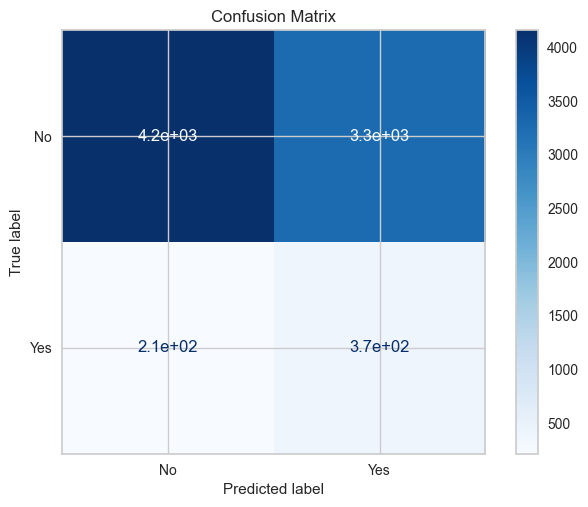

In [34]:
cm_=cm/len(random_states)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_, display_labels=["No", "Yes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

The confusion matrix indicates that our initial solution accurately identifies 370 potential customers out of 580 customer, allowing to detect more than 63 % customers even we face failure to sell to them in current call.

### Solution #3

In [29]:
term_deposit_marketing_2020

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [104]:
filtered_df = term_deposit_marketing_2020[term_deposit_marketing_2020['y'] == 'yes']

In [105]:
columns_to_drop = ['day', 'month', 'duration', 'campaign']
filtered_df = filtered_df.drop(columns=columns_to_drop)

# Step 3: Encode categorical columns using LabelEncoder
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    filtered_df[col] = label_encoders[col].fit_transform(filtered_df[col])

In [106]:
data_for_clustering = filtered_df.drop(columns=['y']) 

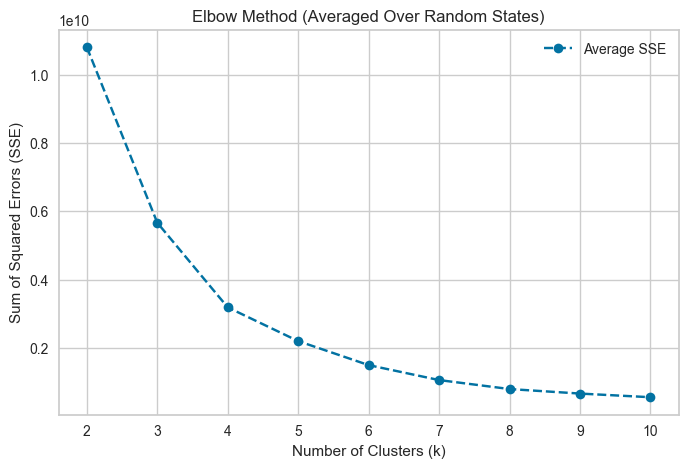

In [107]:

# Initialize lists to store average SSE and silhouette scores
sse_avg = []
k_values = range(2, 11)  # Testing k from 2 to 10

for k in k_values:
    sse_list = []
    
    for seed in random_states:
        kmeans = KMeans(n_clusters=k, random_state=seed, n_init=10)
        labels = kmeans.fit_predict(data_for_clustering)
        sse_list.append(kmeans.inertia_)
    
    # Compute the average values across random states
    sse_avg.append(np.mean(sse_list))

# Plot the averaged Elbow Method curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse_avg, marker='o', linestyle='--', label="Average SSE")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method (Averaged Over Random States)")
plt.legend()
plt.show()



Due to Elbow method analysis, we found that the number of clusters equal to 10 provide the minimum of Squered Error, then we select 10 as the number of clusters.

In [108]:
results = {}
for seed in random_states:
    kmeans = KMeans(n_clusters=10, random_state=seed)  # Adjust `n_clusters` as needed
    filtered_df[f'cluster_seed_{seed}'] = kmeans.fit_predict(data_for_clustering)
    results[seed] = kmeans

In [109]:
print("Clustered Data:")
print(filtered_df)

Clustered Data:
       age  job  marital  education  default  balance  housing  loan  contact  \
83      59    0        1          1        0     2343        1     0        2   
86      56    0        1          1        0       45        0     0        2   
87      41    9        1          1        0     1270        1     0        2   
129     55    7        1          1        0     2476        1     0        2   
168     54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
39986   29    4        2          2        0      637        1     0        0   
39988   55    4        0          2        0     2383        0     0        0   
39990   26    9        2          1        0     1231        1     0        0   
39996   30    4        2          2        0     3340        0     0        0   
39997   54    0        0          1        0      200        0     0        0   

         y 

In [110]:
centroid_list = []

for seed, kmeans in results.items():
    centroid_list.append(kmeans.cluster_centers_)

# Convert to a NumPy array and calculate the mean
centroid_array = np.array(centroid_list)  # Shape: (num_seeds, num_clusters, num_features)
average_centroids = centroid_array.mean(axis=0)  # Mean over seeds (axis=0)

# Convert to a DataFrame for better readability
average_centroids_df = pd.DataFrame(average_centroids, columns=data_for_clustering.columns)

# Display average centroids
print("Average Centroids Across All Random Seeds:")
print(average_centroids_df)

Average Centroids Across All Random Seeds:
         age       job   marital  education       default       balance  \
0  39.610602  4.467008  1.236196   1.305629  1.346885e-02    924.503535   
1  41.895087  4.844525  1.257568   1.470709  2.943100e-03   9161.029509   
2  41.581118  5.656524  1.407297   1.739364 -1.040834e-18  19453.278487   
3  43.306542  4.493896  1.231421   1.413745  3.162333e-03  11219.397475   
4  40.874592  5.458672  1.326053   1.632009  3.306392e-03  11872.783630   
5  41.643167  5.370641  1.383525   1.694160  1.419355e-02  16406.579916   
6  40.684576  5.271627  1.362413   1.617373  4.945477e-03  12381.616167   
7  41.271708  5.001964  1.328869   1.544041  3.980232e-03  12557.076693   
8  40.601421  5.353003  1.385322   1.661435  4.513824e-03  13771.105188   
9  41.238755  5.656920  1.397219   1.703586  5.689900e-04  16981.622756   

    housing      loan   contact  
0  0.506151  0.124165  0.419996  
1  0.434617  0.063823  0.349791  
2  0.443447  0.046341  0.5803

In [111]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler


Processing seed: 392
Processing seed: 406
Processing seed: 393
Processing seed: 221
Processing seed: 845
Processing seed: 638
Processing seed: 226
Processing seed: 958
Processing seed: 660
Processing seed: 491


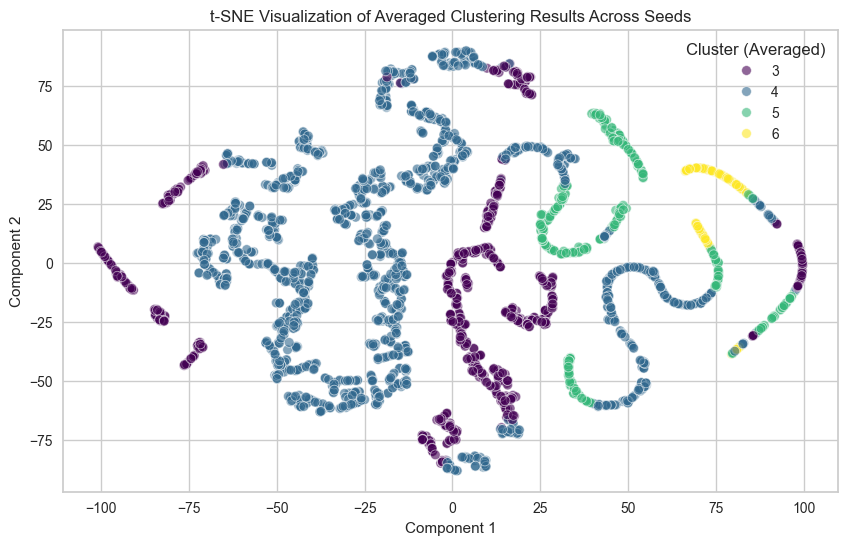

In [119]:
tsne_results = np.zeros((len(data_for_clustering), 2, len(random_states)))
cluster_results = pd.DataFrame(index=filtered_df.index)

# Loop through each random seed
for i, seed in enumerate(random_states):
    print(f"Processing seed: {seed}")

    # Perform t-SNE dimensionality reduction with the current seed
    reducer = TSNE(n_components=2, random_state=seed, perplexity=10)
    tsne_embedded = reducer.fit_transform(data_for_clustering)

    # Store t-SNE results for averaging later
    tsne_results[:, :, i] = tsne_embedded

    # Apply K-Means clustering with the current seed
    kmeans = KMeans(n_clusters=10, random_state=seed)  # Adjust n_clusters as needed
    filtered_df[f'cluster_seed_{seed}'] = kmeans.fit_predict(data_for_clustering)

    # Store cluster assignments
    cluster_results[f'cluster_seed_{seed}'] = filtered_df[f'cluster_seed_{seed}']

# Compute the **average t-SNE coordinates** across all seeds
average_tsne = tsne_results.mean(axis=2)

# Compute the **average cluster assignment** across all seeds
filtered_df['average_cluster'] = cluster_results.mean(axis=1)

# Round the average cluster values to get discrete cluster labels
filtered_df['rounded_cluster'] = filtered_df['average_cluster'].round().astype(int)

# Create a scatter plot of the averaged t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=average_tsne[:, 0], y=average_tsne[:, 1], hue=filtered_df['rounded_cluster'], palette="viridis", alpha=0.6)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster (Averaged)")
plt.title("t-SNE Visualization of Averaged Clustering Results Across Seeds")
plt.show()